In [8]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 31 11:40:59 2024

@author: camer
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

column_names = [
    "dataset", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", "IoTIP", "IoTIP_int",
    "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", "PacketCount", "BytesCount", "reversePacketCount",
    "reverseBytesCount", "SmallPktCount", "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT",
    "FirstNonEmptyPktSize", "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount",
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT",
    "reverseFirstNonEmptyPktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT",
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", "NTP", "TCP_others",
    "UDP_others", "year_month"
]
# Dropped dataset, IoTIP_int, hostIP_int, year_month
df2 = pd.read_csv('../data/sample.csv', names = column_names)
df = df2.drop(columns=['IoTIP', 'hostMac', 'dataset', 'IoTIP_int', 'hostIP_int','hostIP'])
# Defines categorical variables
categories = ['IoTMac',  'ipProto', 'reverseFlowExists', 'remote', 'broadcast', 'HTTP', 'HTTPS', 'DNS', 'NTP', 'TCP_others', 'UDP_others']
for var in categories:
    df[var] = df[var].astype('category')

X = df.drop(columns=['IoTMac'])
y = df['IoTMac']

print(y)

X = pd.get_dummies(X, drop_first=True)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Fits the model on the training data using Naive Bayes
model = GaussianNB()
model.fit(XTrain, yTrain)

yPred = model.predict(XTest)
print(classification_report(yTest, yPred, zero_division=0))
accuracy = accuracy_score(yTest, yPred)

print(f'Accuracy: {accuracy:.5f}')
# Shows true positives, true negatives, false positives, false negatives

cmatrix = confusion_matrix(yTest, yPred)
for f in cmatrix:
    f += 1



0       00:1b:c7:fa:c3:e6:
1       48:d6:d5:92:96:a2:
2       00:1b:c7:fa:c3:e6:
3       04:5d:4b:a4:d0:2e:
4       00:1b:c7:fa:c3:e6:
               ...        
9995    48:d6:d5:92:96:a2:
9996    48:d6:d5:92:96:a2:
9997    6c:5a:b5:56:39:3e:
9998    48:d6:d5:92:96:a2:
9999    04:5d:4b:a4:d0:2e:
Name: IoTMac, Length: 10000, dtype: category
Categories (24, object): ['00:17:88:47:20:f2:', '00:1b:c7:fa:c3:e6:', '00:22:cf:fd:c1:08:', '00:a2:b2:b9:09:87:', ..., 'e0:b9:4d:5c:cf:c5:', 'e0:b9:4d:b9:eb:e9:', 'ec:3d:fd:39:6f:98:', 'ec:f0:0e:55:25:39:']
                    precision    recall  f1-score   support

00:17:88:47:20:f2:       0.50      0.07      0.12        42
00:1b:c7:fa:c3:e6:       1.00      0.99      0.99       184
00:22:cf:fd:c1:08:       0.00      0.00      0.00         3
00:a2:b2:b9:09:87:       0.94      0.13      0.23       121
04:5d:4b:a4:d0:2e:       0.69      0.25      0.37       272
34:76:c5:7f:91:07:       0.50      0.71      0.59       203
34:ea:34:76:ea:68:       0.50 

Categories of y: Index(['00:17:88:47:20:f2:', '00:1b:c7:fa:c3:e6:', '00:22:cf:fd:c1:08:',
       '00:a2:b2:b9:09:87:', '04:5d:4b:a4:d0:2e:', '34:76:c5:7f:91:07:',
       '34:ea:34:76:ea:68:', '38:56:10:00:1d:8c:', '40:9f:38:e7:7f:09:',
       '48:d6:d5:92:96:a2:', '4c:ef:c0:17:e0:42:', '6c:5a:b5:56:39:3e:',
       '70:26:05:73:6e:31:', '70:88:6b:10:22:83:', '78:11:dc:55:76:4c:',
       '80:c5:f2:0b:aa:a9:', 'a8:1e:84:e8:cc:c3:', 'aa:1e:84:06:1c:b4:',
       'b0:ea:bc:ea:ac:86:', 'bc:c3:42:dc:24:78:', 'e0:b9:4d:5c:cf:c5:',
       'e0:b9:4d:b9:eb:e9:', 'ec:3d:fd:39:6f:98:', 'ec:f0:0e:55:25:39:'],
      dtype='object')
[('00:17:88:47:20:f2:', 'philips_hue_bridge'), ('00:1b:c7:fa:c3:e6:', 'planex_camera_one_shot!'), ('00:22:cf:fd:c1:08:', 'planex_smacam_outdoor'), ('00:a2:b2:b9:09:87:', 'jvc_kenwood_cu-hb'), ('04:5d:4b:a4:d0:2e:', 'sony_bravia'), ('34:76:c5:7f:91:07:', 'i-o_data_qwatch'), ('34:ea:34:76:ea:68:', 'link_japan_eremote'), ('38:56:10:00:1d:8c:', 'candy_house_sesami_wi-fi_access_

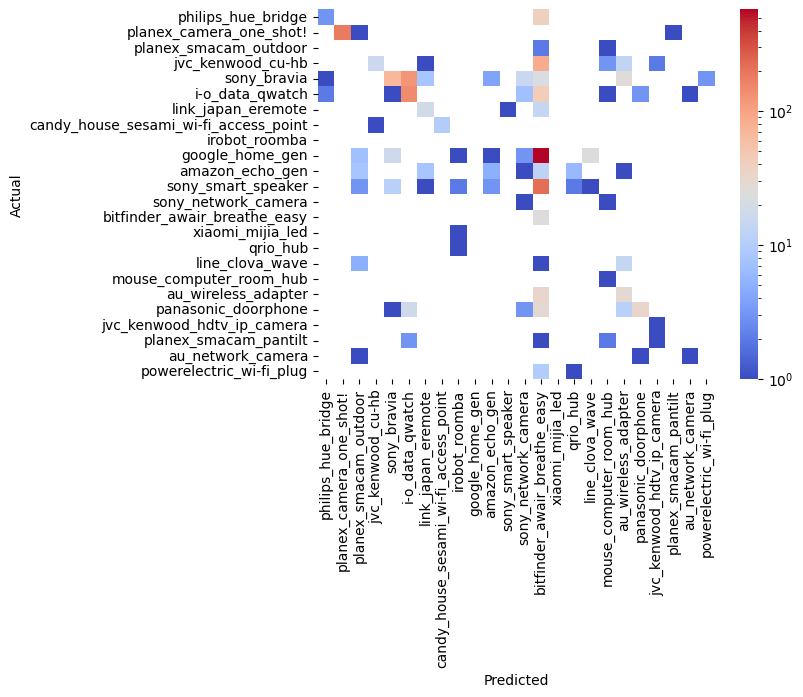

In [24]:

import seaborn as sns
from matplotlib.colors import LogNorm
import re

df3 = pd.read_csv('../data/sample.csv', names=column_names)

# Convert 'IoTMac' to categorical
df3['IoTMac'] = df3['IoTMac'].astype('category')

# Create a mapping dictionary
mac_to_dataset = dict(zip(df3['IoTMac'], df3['dataset']))

# Print the categories of y to see the order
y = df3['IoTMac']
print("Categories of y:", y.cat.categories)

# Create a list of tuples (MAC address, dataset value)
result = [(mac, mac_to_dataset[mac]) for mac in y.cat.categories]

# Modify the dataset values to remove the number and .csv extension
modified_x = [(mac, re.split(r'\d', dataset)[0].rstrip('_')) for mac, dataset in result]

print(modified_x)

cmatrix = confusion_matrix(yTest, yPred)

# Extract the modified dataset names for the heatmap labels
dataset_names = [dataset for _, dataset in modified_x]

# Plot the heatmap with the modified dataset names
sns.heatmap(cmatrix, annot=False, cmap='coolwarm', norm=LogNorm(), xticklabels=dataset_names, yticklabels=dataset_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()